### Practice: gym interfaces

_Reference: based on Practical RL_ [week01](https://github.com/yandexdataschool/Practical_RL/tree/master/week01_intro)

### Gymnasium

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where [open-source gymnasium](https://github.com/Farama-Foundation/Gymnasium) comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games. This is a fork of OpenAI's Gym library by its maintainers (OpenAI handed over maintenance a few years ago to an outside team).

Let's consider discrete version of the classic control environment. 

The Mountain Car MDP is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill

You can find full description of the environment [here](https://gymnasium.farama.org/environments/classic_control/mountain_car/).

![MountainCar-v0](https://gymnasium.farama.org/_images/mountain_car.gif)

So here's how it works:

In [23]:
# %pip install -r ../requirements.txt

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


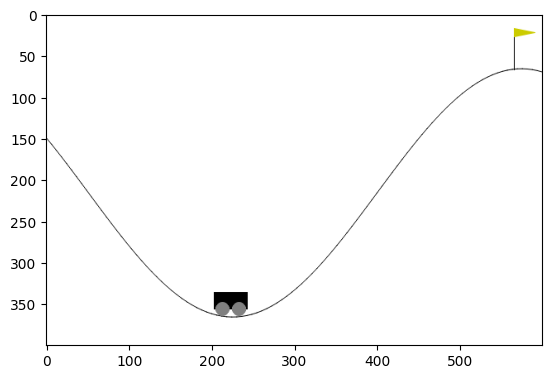

In [2]:
import gymnasium as gym

env = gym.make("MountainCar-v0", render_mode='rgb_array')
env.reset()

plt.imshow(env.render())
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [ ]:
gym.__version__

Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it ~~for now~~.

In [ ]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

In [ ]:
print("taking action 2 (right)")
new_obs, reward, terminated, truncated, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", terminated or truncated)

# Note: as you can see, the car has moved to the right slightly (around 0.0005)

### Play with it

Below is the code that drives the car to the right. 

However, it doesn't reach the flag at the far right due to gravity. 

__Your task__ is to fix it. Find a strategy that reaches the flag. 

You're not required to build any sophisticated algorithms for now, feel free to hard-code :)

__Hint__: your action at each step should depend either on `t` or on `s`.

In [ ]:
new_action = ...

In [ ]:
from IPython import display

# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(render_mode='rgb_array'),
    max_episode_steps=TIME_LIMIT + 1,
)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

choice = 'right'
done = None

for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    # YOUR CODE GOES HERE

    # draw game image on display
    plt.imshow(env.render())
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

In [ ]:
assert s[0] > 0.47
print("You solved it!")